DFT and FFT using numpy and fft

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

(<Axes: title={'center': 'IFFT Image invere'}>,
 Text(0.5, 1.0, 'IFFT Image invere'))

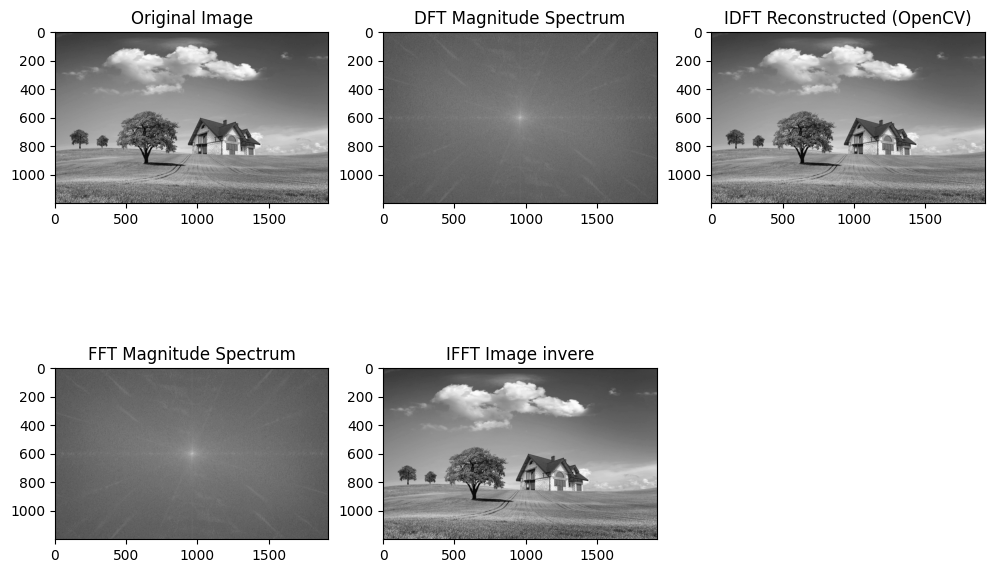

In [20]:
image =  cv2.imread("nature3.png",0)


dft = cv2.dft(np.float32(image) , flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)

magntude = cv2.magnitude(dft_shift[:,:, 0] , dft_shift[:,:,1])
magntude_spectrum = 20*np.log(magntude + 1)
idft = cv2.idft(dft , flags = cv2.DFT_SCALE | cv2.DFT_REAL_OUTPUT)


#dft using   numply  fft
fft_image = np.fft.fft2(image)
fft_shift = np.fft.fftshift(fft_image)
fft_magnitude = 20*np.log(np.abs(fft_shift))

ifft_image = np.fft.ifft2(fft_image).real

plt.figure(figsize=(12,8))

plt.subplot(231) , plt.imshow(image , cmap='gray') , plt.title("Original Image")
plt.subplot(232) , plt.imshow(magntude_spectrum , cmap='gray') , plt.title("DFT Magnitude Spectrum")
plt.subplot(233) , plt.imshow(idft, cmap='gray'), plt.title('IDFT Reconstructed (OpenCV)')


plt.subplot(234) , plt.imshow(fft_magnitude , cmap='gray') , plt.title("FFT Magnitude Spectrum")
plt.subplot(235) , plt.imshow(ifft_image , cmap='gray') , plt.title("IFFT Image invere")

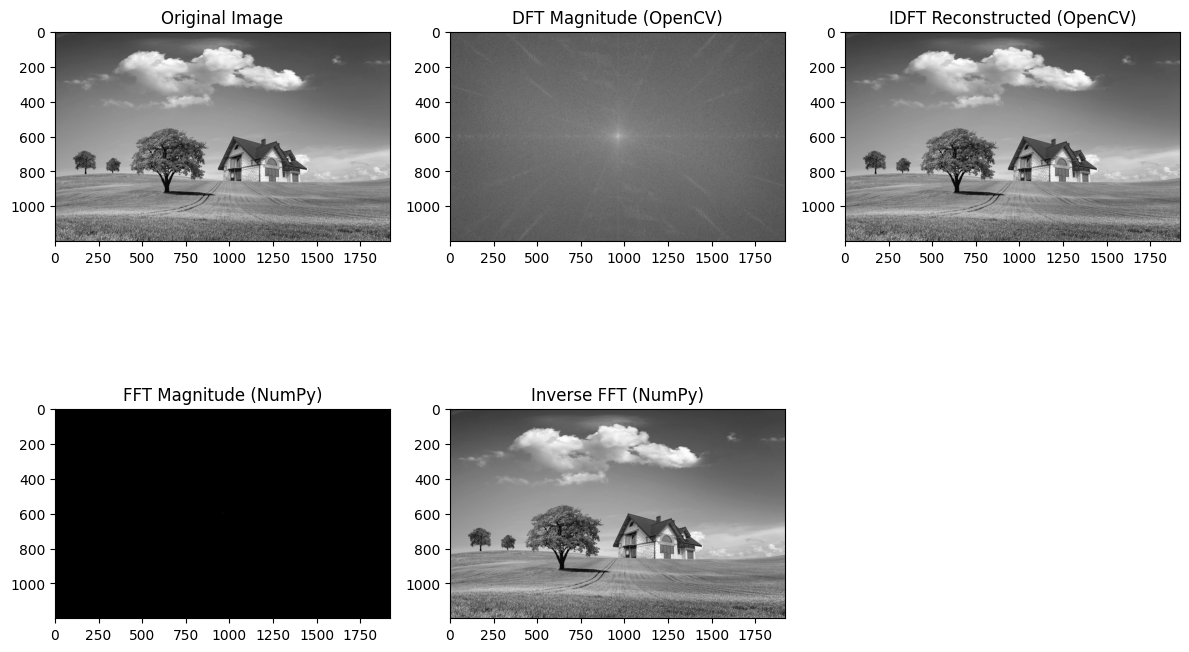

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# =============================
# 1. Load grayscale image
# =============================
image = cv2.imread('nature3.png', cv2.IMREAD_GRAYSCALE)

# =============================
# 2. DFT using OpenCV
# =============================
dft = cv2.dft(np.float32(image), flags=cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)  # Shift zero frequency to center

# Magnitude spectrum
magnitude = cv2.magnitude(dft_shift[:,:,0], dft_shift[:,:,1])
magnitude_spectrum = 20*np.log(1 + magnitude)

# =============================
# 3. Inverse DFT using OpenCV
# =============================
idft = cv2.idft(dft, flags=cv2.DFT_SCALE | cv2.DFT_REAL_OUTPUT)

# =============================
# 4. DFT using NumPy FFT
# =============================
fft_image = np.fft.fft2(image)
fft_shift = np.fft.fftshift(fft_image)
fft_magnitude = np.log(1 + np.abs(fft_shift))

# =============================
# 5. Inverse FFT using NumPy
# =============================
ifft_image = np.fft.ifft2(fft_image).real

# =============================
# 6. Visualization
# =============================
plt.figure(figsize=(12,8))

plt.subplot(231), plt.imshow(image, cmap='gray'), plt.title('Original Image')
plt.subplot(232), plt.imshow(magnitude_spectrum, cmap='gray'), plt.title('DFT Magnitude (OpenCV)')
plt.subplot(233), plt.imshow(idft, cmap='gray'), plt.title('IDFT Reconstructed (OpenCV)')

plt.subplot(234), plt.imshow(np.abs(fft_shift), cmap='gray'), plt.title('FFT Magnitude (NumPy)')
plt.subplot(235), plt.imshow(ifft_image, cmap='gray'), plt.title('Inverse FFT (NumPy)')

plt.tight_layout()
plt.show()
